<a href="https://colab.research.google.com/github/rajiv1817/NLP/blob/main/NLP_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

122010304017-Rajiv

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "kolkata big city india trade","mumbai financial capital india","delhi capital india","kolkata capital colonial times",
     "bangalore tech hub india software","mumbai hub trade commerce stock exchange","kolkata victoria memorial","delhi india gate",
      "mumbai gate way india trade business","delhi red fort india","kolkata metro oldest india",
      "delhi metro largest metro network india"
]


In [2]:
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)


In [3]:
print(v.vocabulary_)


print(v.idf_)



{'kolkata': 14, 'big': 1, 'city': 4, 'india': 13, 'trade': 26, 'mumbai': 18, 'financial': 9, 'capital': 3, 'delhi': 7, 'colonial': 5, 'times': 25, 'bangalore': 0, 'tech': 24, 'hub': 12, 'software': 22, 'commerce': 6, 'stock': 23, 'exchange': 8, 'victoria': 27, 'memorial': 16, 'gate': 11, 'way': 28, 'business': 2, 'red': 21, 'fort': 10, 'metro': 17, 'oldest': 20, 'largest': 15, 'network': 19}
[2.87180218 2.87180218 2.87180218 2.178655   2.87180218 2.87180218
 2.87180218 1.95551145 2.87180218 2.87180218 2.87180218 2.46633707
 2.46633707 1.26236426 1.95551145 2.87180218 2.87180218 2.46633707
 2.178655   2.87180218 2.87180218 2.87180218 2.87180218 2.87180218
 2.87180218 2.87180218 2.178655   2.87180218 2.87180218]


In [4]:
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:

    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)

    #get the score
    idf_score = v.idf_[indx]

    print(f"{word} : {idf_score}")


bangalore : 2.8718021769015913
big : 2.8718021769015913
business : 2.8718021769015913
capital : 2.1786549963416464
city : 2.8718021769015913
colonial : 2.8718021769015913
commerce : 2.8718021769015913
delhi : 1.9555114450274362
exchange : 2.8718021769015913
financial : 2.8718021769015913
fort : 2.8718021769015913
gate : 2.466337068793427
hub : 2.466337068793427
india : 1.262364264467491
kolkata : 1.9555114450274362
largest : 2.8718021769015913
memorial : 2.8718021769015913
metro : 2.466337068793427
mumbai : 2.1786549963416464
network : 2.8718021769015913
oldest : 2.8718021769015913
red : 2.8718021769015913
software : 2.8718021769015913
stock : 2.8718021769015913
tech : 2.8718021769015913
times : 2.8718021769015913
trade : 2.1786549963416464
victoria : 2.8718021769015913
way : 2.8718021769015913


In [5]:
print(transform_output.toarray())

[[0.         0.55620601 0.         0.         0.55620601 0.
  0.         0.         0.         0.         0.         0.
  0.         0.24449267 0.3787403  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.42195838 0.         0.        ]
 [0.         0.         0.         0.49548314 0.         0.
  0.         0.         0.         0.65312294 0.         0.
  0.         0.28709466 0.         0.         0.         0.
  0.49548314 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.68336611 0.         0.
  0.         0.61337397 0.         0.         0.         0.
  0.         0.3959585  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.43516515 0.         0.57361455
  0.         0.         0.         0. 

In [6]:
import pandas as pd
import numpy as np
#read the data into a pandas dataframe


In [16]:
from google.colab import files
uploaded = files.upload()

Saving BBC News Train.csv to BBC News Train (1).csv


In [17]:
df = pd.read_csv("BBC News Train.csv")
print(df.shape)
df.head(5)


(1490, 3)


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


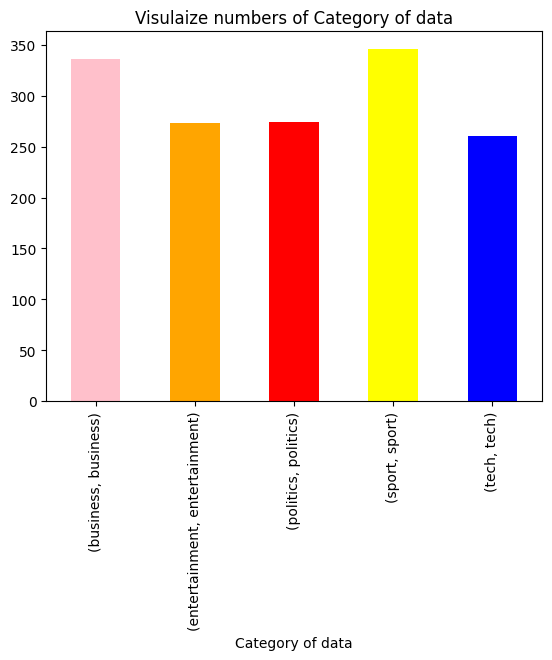

In [18]:
import matplotlib.pyplot as plt
df.groupby('Category').Category.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = np.array(df.iloc[:,0].values)
y = np.array(df.Category.values)
tfidf = TfidfVectorizer(max_features = 5000)
x = tfidf.fit_transform(df.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))


X.shape =  (1490, 5000)
y.shape =  (1490,)
1192
298


In [20]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)
print(y_pred)
classifier.score(x,y)


['entertainment' 'politics' 'sport' 'politics' 'sport' 'business'
 'business' 'tech' 'entertainment' 'business' 'sport' 'entertainment'
 'politics' 'tech' 'sport' 'tech' 'business' 'entertainment' 'business'
 'entertainment' 'tech' 'tech' 'entertainment' 'tech' 'business'
 'business' 'politics' 'sport' 'entertainment' 'tech' 'entertainment'
 'sport' 'sport' 'entertainment' 'entertainment' 'business' 'business'
 'business' 'business' 'tech' 'sport' 'business' 'politics' 'business'
 'sport' 'entertainment' 'sport' 'entertainment' 'tech' 'sport' 'politics'
 'sport' 'entertainment' 'sport' 'sport' 'entertainment' 'entertainment'
 'politics' 'sport' 'entertainment' 'sport' 'tech' 'sport' 'business'
 'sport' 'tech' 'business' 'tech' 'business' 'entertainment' 'sport'
 'sport' 'entertainment' 'tech' 'tech' 'politics' 'politics' 'politics'
 'entertainment' 'tech' 'business' 'tech' 'entertainment' 'entertainment'
 'entertainment' 'sport' 'tech' 'business' 'business' 'business'
 'business' 'busi

0.9899328859060402

In [21]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
score = regressor.score(x_train, y_train)
print(score)


0.9949664429530202


In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
classifier.fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)
print(y_pred)
classifier.score(x,y)


['entertainment' 'politics' 'sport' 'politics' 'sport' 'business'
 'business' 'tech' 'entertainment' 'tech' 'sport' 'entertainment'
 'politics' 'tech' 'sport' 'tech' 'business' 'entertainment' 'politics'
 'entertainment' 'tech' 'tech' 'entertainment' 'tech' 'business'
 'business' 'politics' 'sport' 'entertainment' 'tech' 'entertainment'
 'sport' 'entertainment' 'entertainment' 'entertainment' 'business'
 'business' 'politics' 'tech' 'tech' 'sport' 'business' 'politics'
 'business' 'sport' 'entertainment' 'sport' 'entertainment' 'tech' 'sport'
 'politics' 'sport' 'entertainment' 'sport' 'sport' 'entertainment'
 'entertainment' 'business' 'sport' 'entertainment' 'sport' 'business'
 'sport' 'business' 'sport' 'tech' 'business' 'tech' 'business'
 'entertainment' 'sport' 'sport' 'entertainment' 'business' 'tech'
 'politics' 'politics' 'politics' 'entertainment' 'tech' 'tech' 'tech'
 'entertainment' 'entertainment' 'tech' 'sport' 'tech' 'business'
 'business' 'business' 'business' 'business'

0.9604026845637584

In [23]:
y_pred1 = tfidf.transform(['hyundai to build new india plant south korea s hyundai motor has announced that it plans to build a second plant in india to meet the country s growing demand for cars.  the company didn t give details of its'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [1]:
  result = "Entertainment News"
print(yy)

['business']
